In [1]:
import networkx as nx
import numpy as np
from scipy import random
import copy
import random
from collections import OrderedDict
import pickle
import itertools
from multiprocessing import Pool
from utils_RSC_interactive_ABseparated import *

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Simplicial complex parameters
N = 2000
k1 = 20
k2 = 6
p1, p2 = get_p1_and_p2(k1,k2,N)

#Infection parameters - A
mu_A=0.05
lambda1s_A=[]
for i in np.arange(0, 2, 0.05):
    lambda1s_A.append(i)
lambdaD_A_target = 0.
I_A_percentage = 5 #initial conditions (% of infected)

#Infection parameters - B
mu_B=0.05
lambda1s_B=[]
for i in np.arange(0, 2, 0.05):
    lambda1s_B.append(1.5)
lambdaD_B_target=0.
I_B_percentage= 5 #initial conditions (% of infected)

I_AB_percentage = 1

#Interaction parameters
epsilon_A = 1.
epsilon_B_list = [1., 2., 4., 6.] 
#Simulation Parameters
t_max = 6000
n_simulations = 64

out_dir = '/Users/thomasrobiglio/simplicialSad/thesis/Results2/' #modifica

In [3]:
from scipy.integrate import solve_ivp
from tqdm.notebook import tqdm

def contagion(t, y, ea, eb, lambda1_a, lambda2_a, lambda1_b, lambda2_b):
    w, u, v = y;
    s = 1 - w - u - v;
    return [
            -2*w +eb*(lambda1_a *(u+w) * v + lambda2_a*((u+w)**2) * v) + ea*(lambda1_b*(v+w)*u + lambda2_b*((v+w)**2) * u),
           -u -ea*(lambda1_b * (v+w) * u + lambda2_b*((v+w)**2)*u) + lambda1_a*(u+w)*s + lambda2_a*((u+w)**2)*s + w,
           -v -eb*(lambda1_a * (u+w) * v + lambda2_a*((u+w)**2)*v) + lambda1_b*(v+w)*s + lambda2_b*((v+w)**2)*s + w]

In [4]:
#Infection parameters - A
mu_A=0.05
lambda1s_A=[]
for i in np.arange(0, 2, 0.05):
    lambda1s_A.append(i)
lambdaD_A_target = 0.
I_A_percentage = 5 #initial conditions (% of infected)

#Infection parameters - B
mu_B=0.05
lambda1_B = 1.5
lambdaD_B_target=0.
I_B_percentage= 5 #initial conditions (% of infected)

I_AB_percentage = 1

#Interaction parameters
epsilon_A = 1.
epsilon_B_list = [1., 2., 4., 6.]

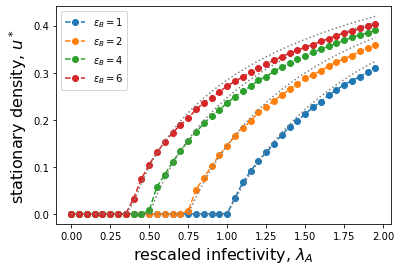

In [5]:
lables = [r'$\epsilon_B=1$',r'$\epsilon_B=2$',r'$\epsilon_B=4$', r'$\epsilon_B=6$']
i=0
for epsilon_B in epsilon_B_list:
    filename = 'result_RSC_interactive_'+'N'+str(N)+'_k'+str(k1)+'_kD'+str(k2)+'_lDA'+str(lambdaD_A_target)+'_eA'+str(epsilon_A)+'_eB'+str(epsilon_B)+'_seedA'+str(I_A_percentage)+'_seedB'+str(I_B_percentage)+'_seedAB'+str(I_AB_percentage)+'.p'
    results = pickle.load(open(out_dir+filename, "rb" ))
    avg_rhos_A, avg_rhos_B, avg_rhos_AB, avg_k, avg_kD = parse_results(results)
    plt.plot(lambda1s_A, avg_rhos_A,'o--',label=lables[i])
    i=i+1
    ODE_density_A = []
    ODE_density_B = []
    ODE_density_AB = []
    for lambda1_A in lambda1s_A:
        y0 = [I_AB_percentage/100, I_A_percentage/100, I_B_percentage/100]
        tspan = [0,3000]
        args_list = (epsilon_A, epsilon_B, lambda1_A, lambdaD_A_target, lambda1_B, lambdaD_B_target)
        ode_sol = solve_ivp(contagion, tspan, y0, args = args_list, vectorized=True, dense_output=True)
        t = np.linspace(*tspan, 100)
        z = ode_sol.sol(t)
        density_A_ode = z.T[:,1]
        density_B_ode = z.T[:,2]
        density_AB_ode = z.T[:,0]
        ODE_density_A.append(np.mean(density_A_ode[-20:]))
        ODE_density_B.append(np.mean(density_B_ode[-20:]))
        ODE_density_AB.append(np.mean(density_AB_ode[-20:]))
    plt.plot(lambda1s_A, ODE_density_A,linestyle='dotted', color='grey')
plt.xlabel(r'rescaled infectivity, $\lambda_A$',size=16)
plt.ylabel(r'stationary density, $u^*$', size=16)
plt.legend()
plt.show()

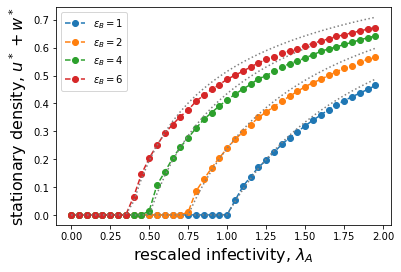

In [6]:
lables = [r'$\epsilon_B=1$',r'$\epsilon_B=2$',r'$\epsilon_B=4$', r'$\epsilon_B=6$']
i=0
for epsilon_B in epsilon_B_list:
    filename = 'result_RSC_interactive_'+'N'+str(N)+'_k'+str(k1)+'_kD'+str(k2)+'_lDA'+str(lambdaD_A_target)+'_eA'+str(epsilon_A)+'_eB'+str(epsilon_B)+'_seedA'+str(I_A_percentage)+'_seedB'+str(I_B_percentage)+'_seedAB'+str(I_AB_percentage)+'.p'
    results = pickle.load(open(out_dir+filename, "rb" ))
    avg_rhos_A, avg_rhos_B, avg_rhos_AB, avg_k, avg_kD = parse_results(results)
    record_simulation=[]
    for j in range(len(avg_rhos_A)):
        record_simulation.append(avg_rhos_A[j]+avg_rhos_AB[j])
    plt.plot(lambda1s_A, record_simulation,'o--',label=lables[i])
    i=i+1
    ODE_density_A = []
    ODE_density_B = []
    ODE_density_AB = []
    for lambda1_A in lambda1s_A:
        y0 = [I_AB_percentage/100, I_A_percentage/100, I_B_percentage/100]
        tspan = [0,3000]
        args_list = (epsilon_A, epsilon_B, lambda1_A, lambdaD_A_target, lambda1_B, lambdaD_B_target)
        ode_sol = solve_ivp(contagion, tspan, y0, args = args_list, vectorized=True, dense_output=True)
        t = np.linspace(*tspan, 100)
        z = ode_sol.sol(t)
        density_A_ode = z.T[:,1]
        density_B_ode = z.T[:,2]
        density_AB_ode = z.T[:,0]
        ODE_density_A.append(np.mean(density_A_ode[-20:]))
        ODE_density_B.append(np.mean(density_B_ode[-20:]))
        ODE_density_AB.append(np.mean(density_AB_ode[-20:]))
    record_ODE = []
    for k in range(len(ODE_density_A)):
        record_ODE.append(ODE_density_A[k]+ODE_density_AB[k])
    plt.plot(lambda1s_A, record_ODE,linestyle='dotted', color='grey')
plt.xlabel(r'rescaled infectivity, $\lambda_A$',size=16)
plt.ylabel(r'stationary density, $u^*+w^*$', size=16)
plt.legend()
plt.show()